<a href="https://colab.research.google.com/github/AndoniFikri/Credit-Risk-Prediction-with-Deployment/blob/main/Preprocessing_Data_Set_(DTS_Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#Import Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Set/credit_risk_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [ ]:
numerical = df.select_dtypes([np.number]).columns.tolist()
numerical

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [ ]:
categorical = df.select_dtypes('object').columns.tolist()
categorical


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

#EDA

##Check For Outlier

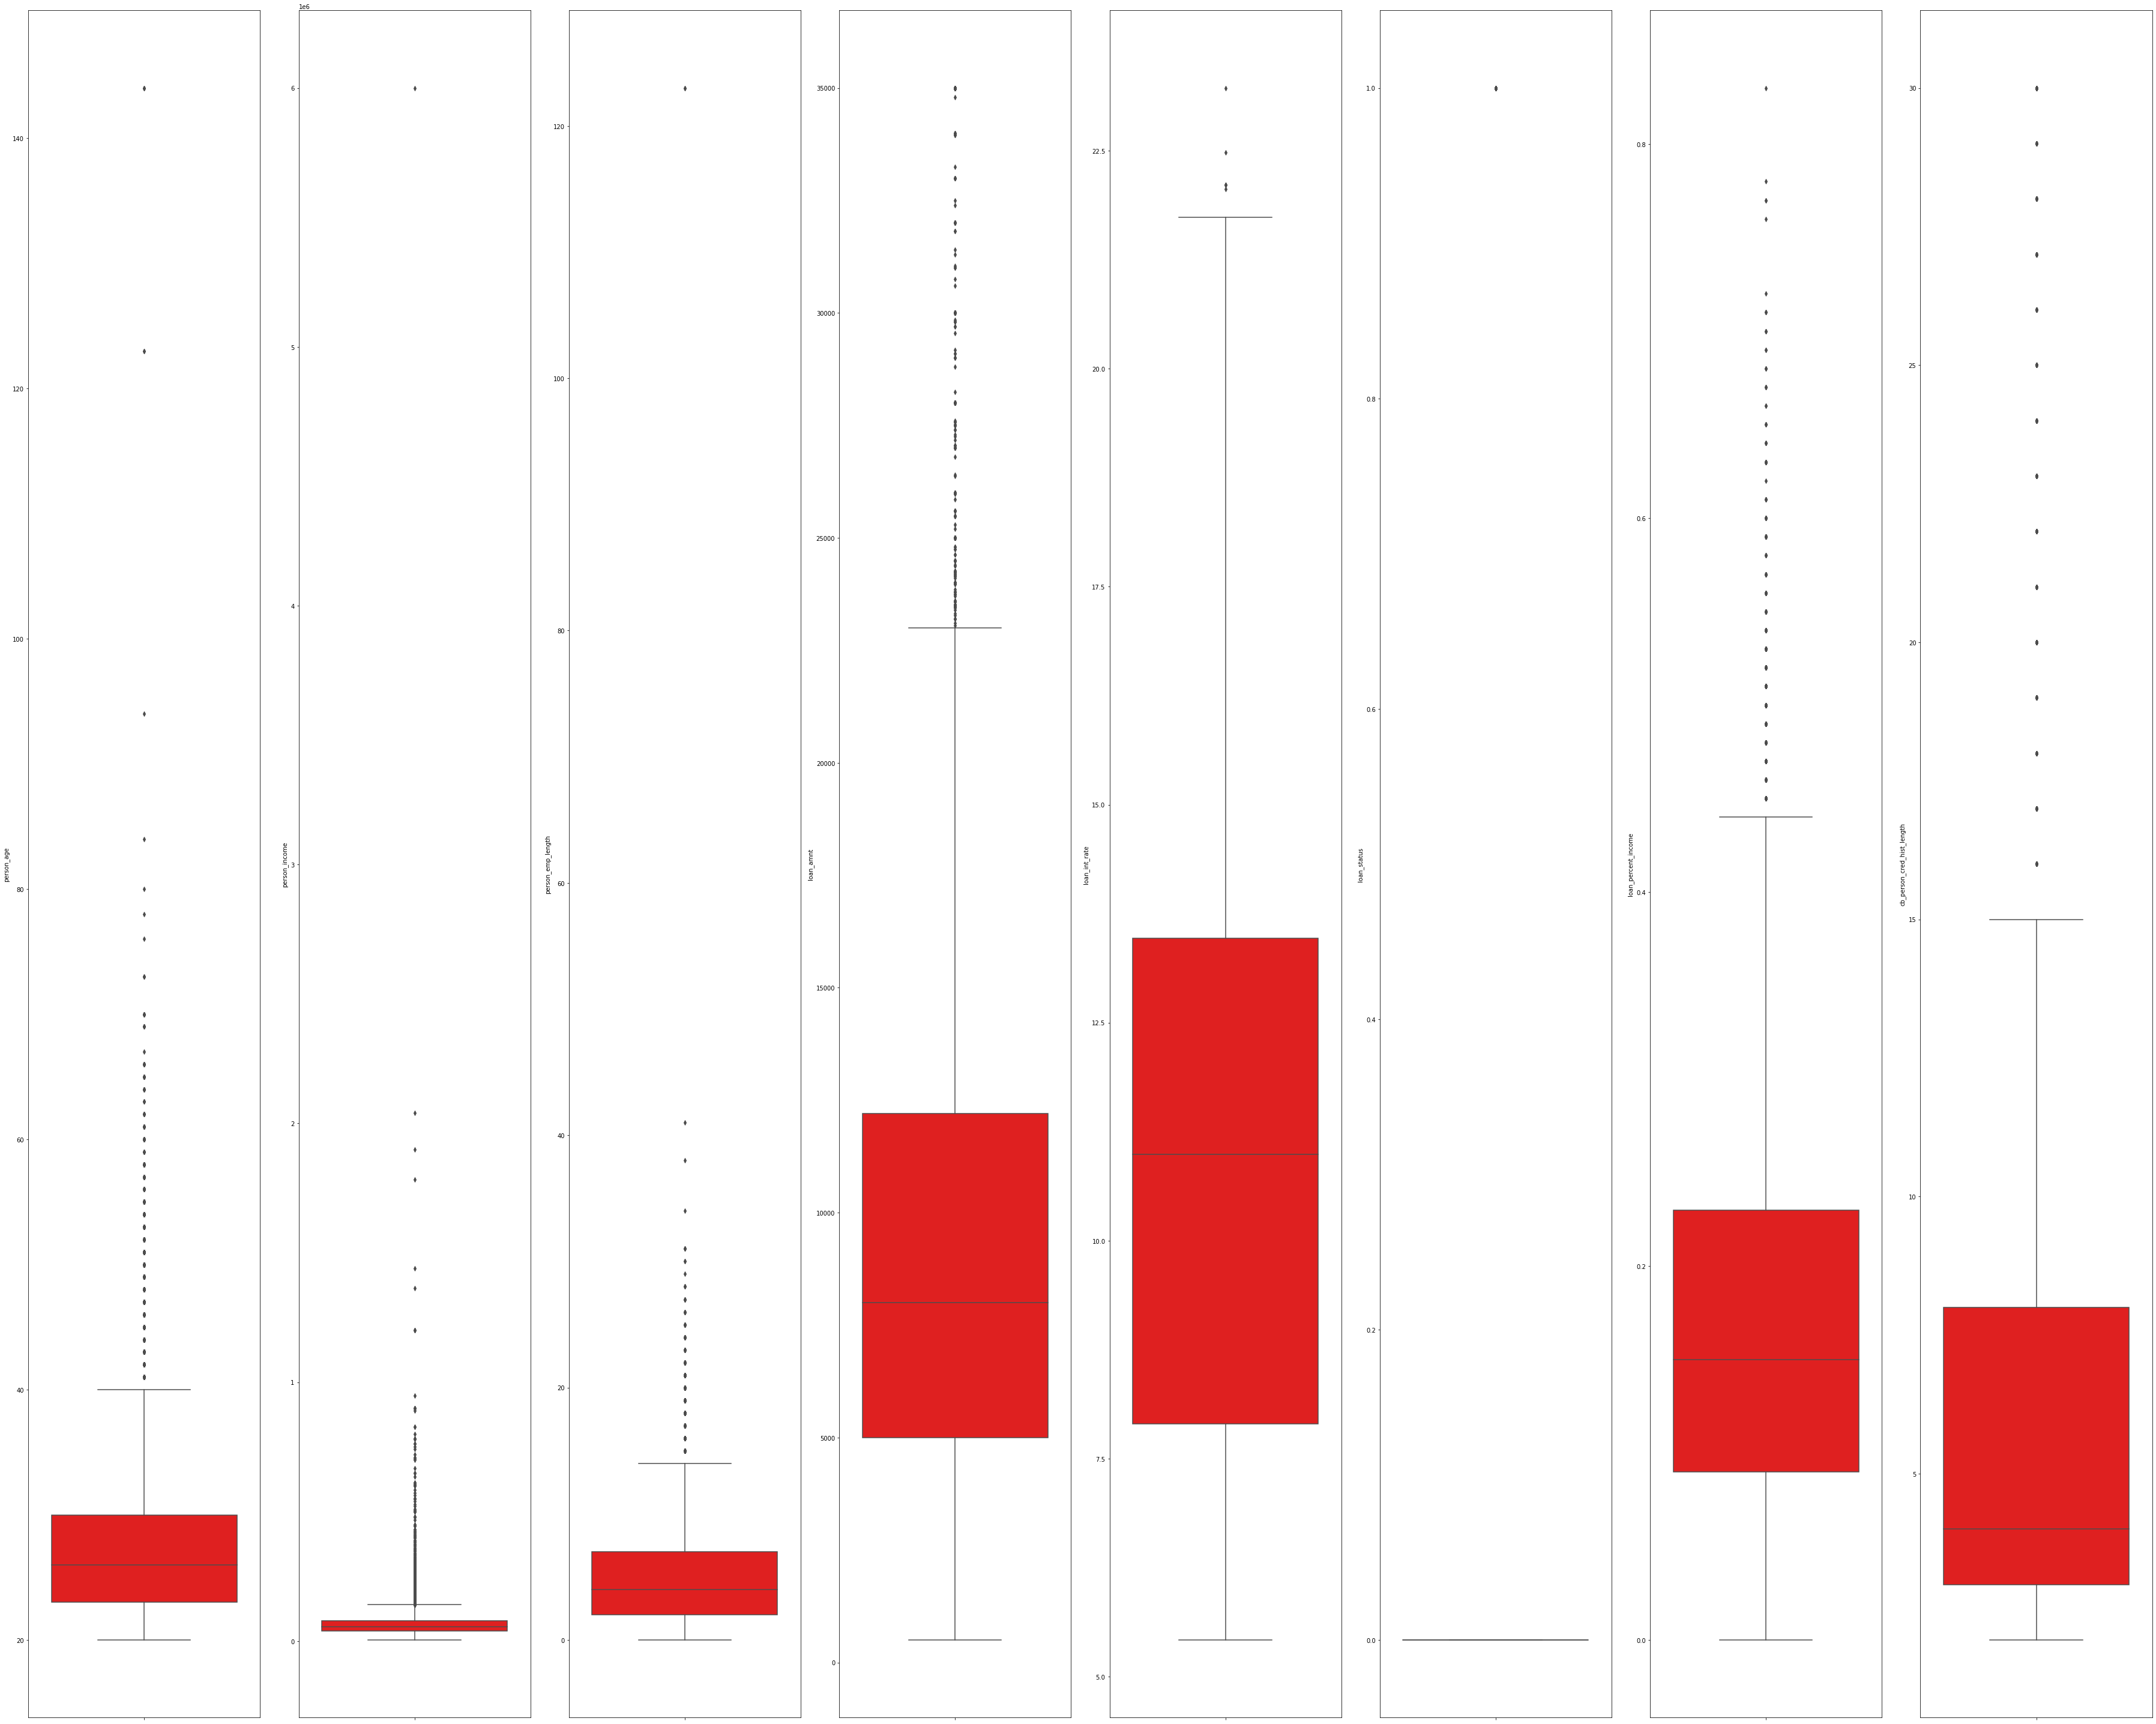

In [ ]:
#For Pure Numerical Values 

plt.figure(figsize=(50,40))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Conclusion: Some Values contain outlier in the dataset

##Check for missing value and duplicated data

In [ ]:
df.isnull().sum()/len(df)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Drop dataset with missing values less than 5%, fill with median for `loan_int_rate`

In [ ]:
df.dropna(subset = ['person_emp_length'], inplace=True)
#Rechek For Missing Value
df.isnull().sum()/len(df)*100

person_age                    0.00000
person_income                 0.00000
person_home_ownership         0.00000
person_emp_length             0.00000
loan_intent                   0.00000
loan_grade                    0.00000
loan_amnt                     0.00000
loan_int_rate                 9.61939
loan_status                   0.00000
loan_percent_income           0.00000
cb_person_default_on_file     0.00000
cb_person_cred_hist_length    0.00000
dtype: float64

In [ ]:
#Filling missing value 
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)
#Rechek For Missing Value
df.isnull().sum()/len(df)*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

##Preprocessing Categorical Variable

In [ ]:
df[categorical].describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,31686,31686,31686,31686
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16076,6290,10371,26057


In [ ]:
df['person_home_ownership'].value_counts()

RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
df = df[df['person_home_ownership'] != 'OTHER']

In [ ]:
#Recheck for person home ownership
df['person_home_ownership'].value_counts()

RENT        16076
MORTGAGE    13093
OWN          2410
Name: person_home_ownership, dtype: int64

##Preprocessing `person_home_ownership` 

In [ ]:
home_enc = {"RENT" : 0,
          "MORTGAGE" : 1,
          "OWN" : 2,
          }
df['person_home_ownership'] = df['person_home_ownership'].map(home_enc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['person_home_ownership'].value_counts()

0    16076
1    13093
2     2410
Name: person_home_ownership, dtype: int64

##Preprocessing `loan_intent`

In [ ]:
df['loan_intent'].value_counts()

EDUCATION            6273
MEDICAL              5880
VENTURE              5530
PERSONAL             5351
DEBTCONSOLIDATION    5047
HOMEIMPROVEMENT      3498
Name: loan_intent, dtype: int64

To make the model more simple, we're gonna drop this column and neglect the intention effect for the credit risk.

In [ ]:
df = df.drop('loan_intent', axis=1)

##Preprocessing `loan_grade`

In [ ]:
df['loan_grade'].value_counts()

A    10345
B    10152
C     6304
D     3536
E      944
F      234
G       64
Name: loan_grade, dtype: int64

In [ ]:
grade_enc = {"G" : 0,
          "F" : 1,
          "E" : 2,
          "D" : 3, 
          "C" : 4, 
          "B" : 5, 
          "A" : 6
          }
df['loan_grade'] = df['loan_grade'].map(grade_enc)

##Preprocessing `cb_person_default_on_file`

In [ ]:
df['cb_person_default_on_file'].value_counts()/len(df)*100

N    82.266696
Y    17.733304
Name: cb_person_default_on_file, dtype: float64

In [ ]:
cb_enc = {"N" : 0, 
          "Y" :1}
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(cb_enc)

##Outlier Handling

In [ ]:
df[numerical].nunique()

person_age                      58
person_income                 4116
person_emp_length               36
loan_amnt                      749
loan_int_rate                  349
loan_status                      2
loan_percent_income             77
cb_person_cred_hist_length      29
dtype: int64

In [ ]:
column=df.columns.tolist()
column

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [ ]:
target=['loan_status']
column_feature = [feature for feature in column if feature not in target] 
column_feature

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [ ]:
#Handling Outlier
for col in column_feature: 
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  IQR = q3 - q1 
  lower_limit = q1 - (IQR * 1.5)
  upper_limit = q3 + (IQR * 1.5)
  df[col] = np.where(df[col]> upper_limit, upper_limit,
                        np.where(df[col]< lower_limit, lower_limit,
                          df[col]))

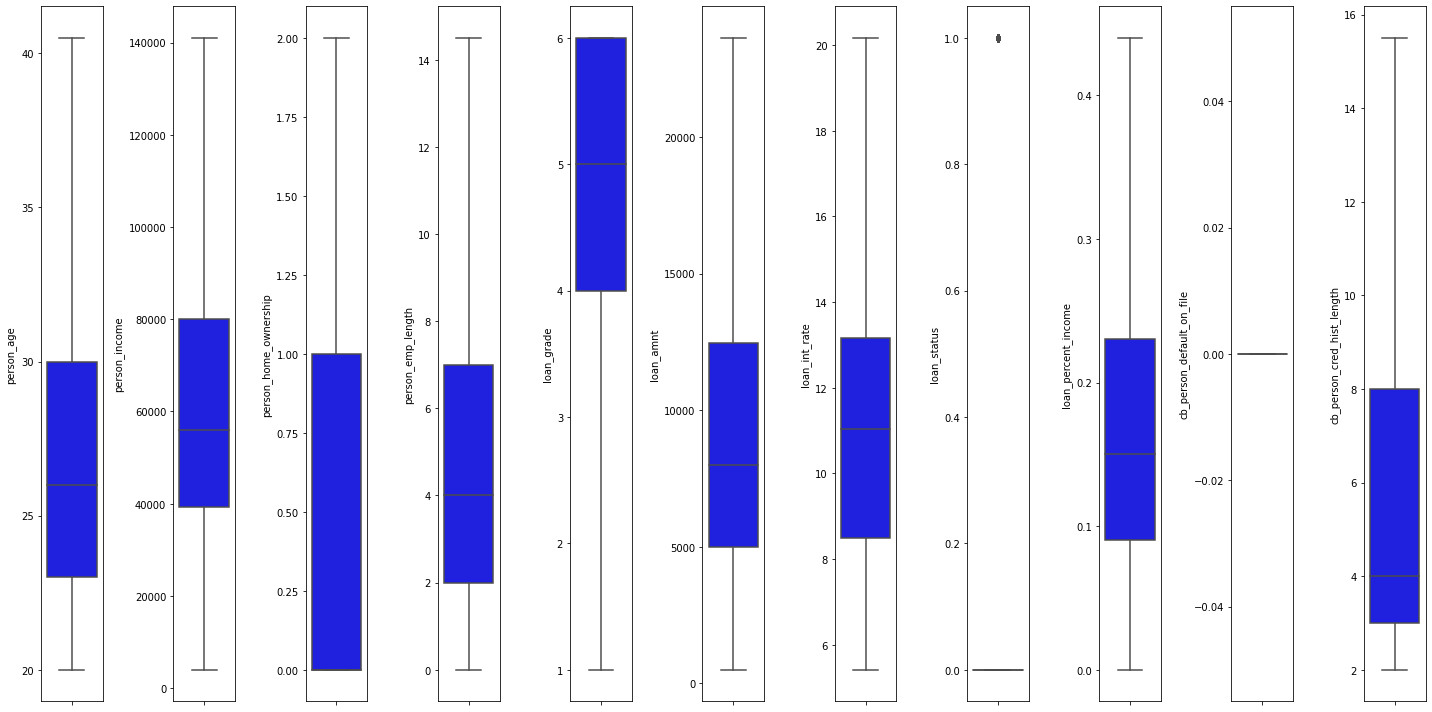

In [ ]:
#Check for boxplot after handling outlier 
#Recheck for Outlier
#For Pure Numerical Values 

plt.figure(figsize=(20,10))

# plotting
features = df.columns.tolist()
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

In [ ]:
#Final Shape 
df.shape

(31579, 11)

#Download Cleaned Data set

In [ ]:
from google.colab import files
df.to_csv('credit risk cleaned.csv') 
files.download('credit risk cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>